<a href="https://colab.research.google.com/github/dudechego/My-ML-Projects/blob/main/Unsupervised%20Learning/Anomaly_Detection_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load Dataset
path = "/content/drive/MyDrive/datasets/ds_salaries.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
#Get the salaries
X = df["salary_in_usd"]
X

,salary_in_usd
0,79833
1,260000
2,109024
3,20000
4,150000
...,...
602,154000
603,126000
604,129000
605,150000


In [ ]:
X.shape

(607,)

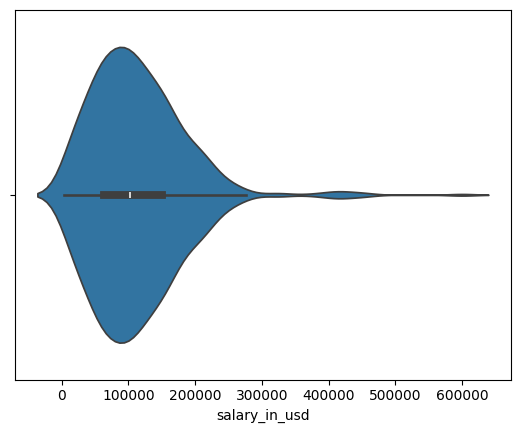

In [ ]:
#Plot our salaries
sns.violinplot(x=X)
plt.show()

In [ ]:
#Let's Detect Some Anomalies
isolations = IsolationForest(
n_estimators=150, max_samples="auto",
max_features=1.0, random_state=2
)
Y = isolations.fit_predict(df[["salary_in_usd"]])

In [ ]:
print(Y)

[ 1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1
  1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1
  1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1
 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1
  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1
  1  1  1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1
 -1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1
 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1
  1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1 -1  1
 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1

In [ ]:
#Change it to Anomaly and Normal
anomalies = []
for anomaly in Y:
    if anomaly == -1:
        anomaly = "Anomaly"
    elif anomaly == 1:
        anomaly = "Normal"
    anomalies.append(anomaly)

print(anomalies)

['Normal', 'Anomaly', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Anomaly', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Anomaly', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Anomaly', 'Anomaly', 'Anomaly', 'Normal', 'Anomaly', 'An

In [ ]:
new_df = pd.DataFrame()
new_df["salary"] = df["salary_in_usd"]
new_df["label"] = anomalies
new_df["cluster"] = Y
new_df.head()

,salary,label,cluster
0,79833,Normal,1
1,260000,Anomaly,-1
2,109024,Normal,1
3,20000,Anomaly,-1
4,150000,Normal,1


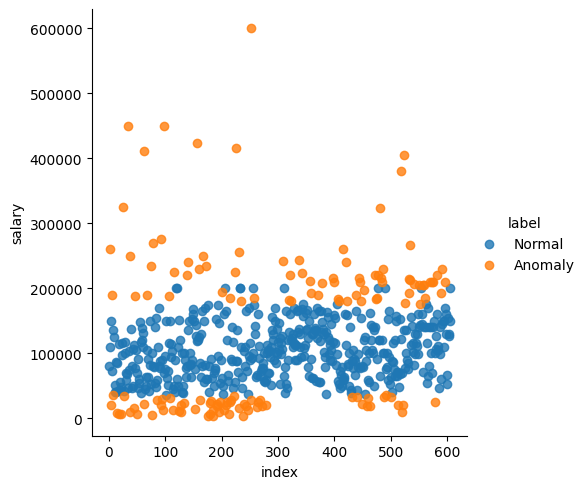

In [ ]:
#Plot our Data
new_df["index"] = range(len(new_df))

sns.lmplot(x="index",
y="salary", data=new_df, hue="label",
fit_reg=False
)
plt.show()

In [ ]:
print(accuracy_score(X,Y))

0.0
